In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')

import fastf1_util

Mounted at /content/drive


In [2]:
!pip install fastf1

In [3]:
import fastf1
import fastf1.plotting
fastf1.plotting.setup_mpl(misc_mpl_mods=False)
# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
session = fastf1.get_session(2024, 11, 'r')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (97.68 MB) /root/.cache/fastf1
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.3.8]
INFO:fastf1.fastf1.core:Loading data for Austrian Grand Prix - Race [v3.3.8]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_da

In [5]:
laps = session.laps.pick_quicklaps()
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()
# Get compound colors
compound_colors = fastf1.plotting.COMPOUND_COLORS
print('Compound colors', compound_colors)

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

drivers = session.drivers
driver_laps = session.laps.pick_drivers(drivers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

finishing_order = [session.get_driver(i)["Abbreviation"] for i in drivers]
print('Finishing order: ', finishing_order)
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

Compound colors {'SOFT': '#da291c', 'MEDIUM': '#ffd12e', 'HARD': '#f0f0ec', 'INTERMEDIATE': '#43b02a', 'WET': '#0067ad', 'UNKNOWN': '#00ffff', 'TEST-UNKNOWN': '#434649'}
Index(['McLaren', 'Ferrari', 'Mercedes', 'Red Bull Racing', 'Haas F1 Team',
       'Alpine', 'RB', 'Aston Martin', 'Kick Sauber', 'Williams'],
      dtype='object', name='Team')
Finishing order:  ['RUS', 'PIA', 'SAI', 'HAM', 'VER', 'HUL', 'PER', 'MAG', 'RIC', 'GAS', 'LEC', 'OCO', 'STR', 'TSU', 'ALB', 'BOT', 'ZHO', 'ALO', 'SAR', 'NOR']


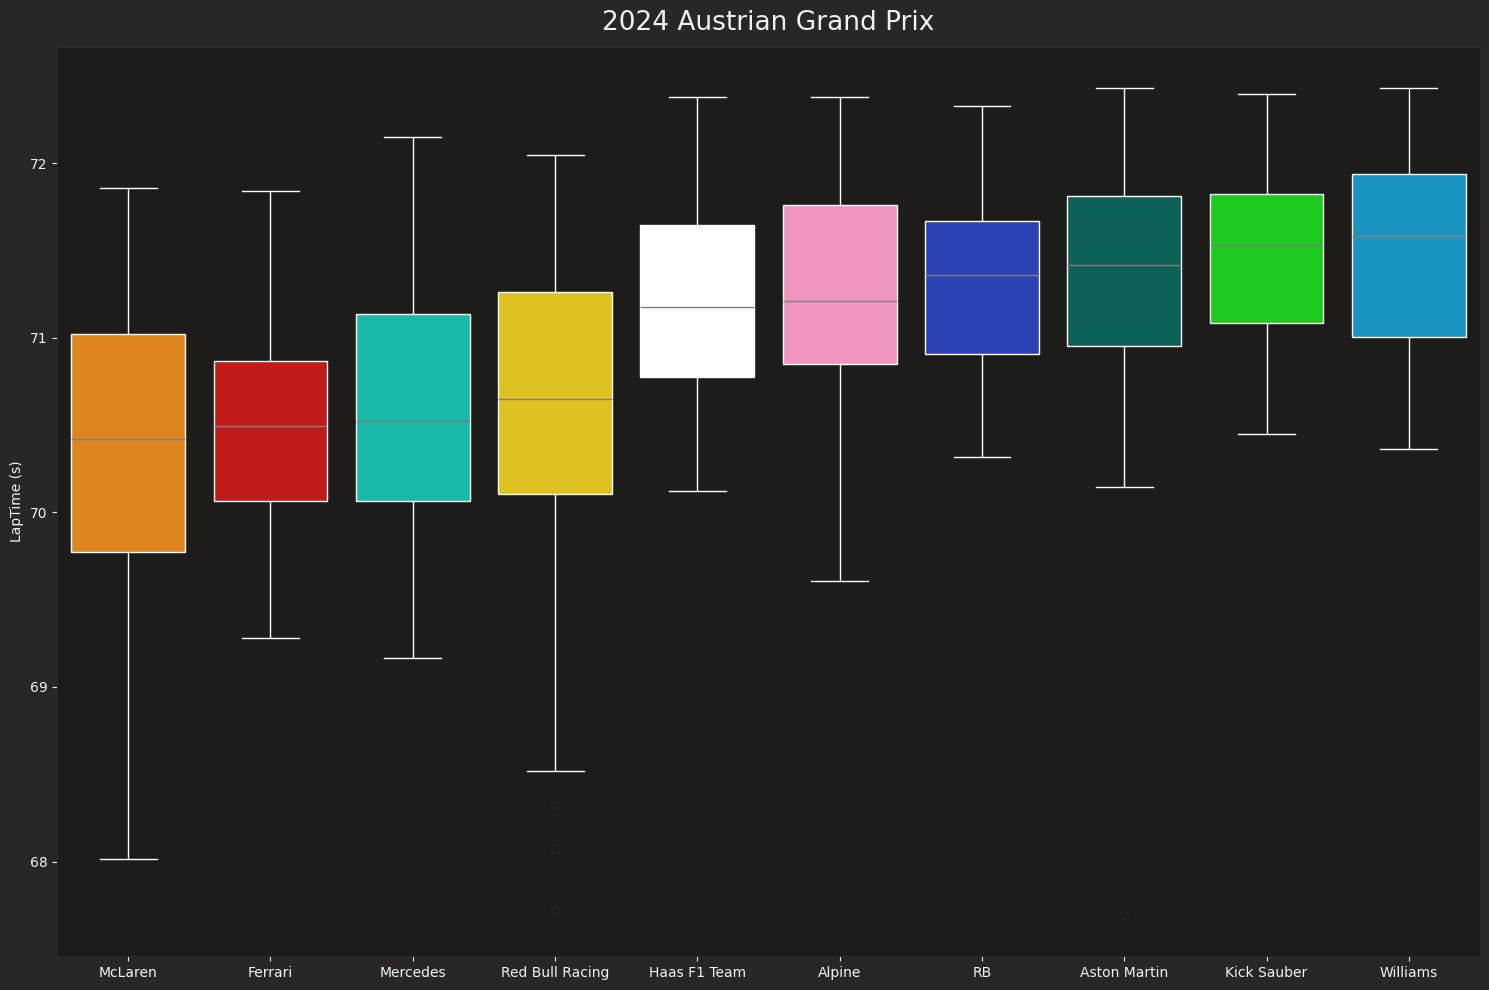

In [6]:
fastf1_util.plot_laptimes_boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    title="2024 Austrian Grand Prix"
)

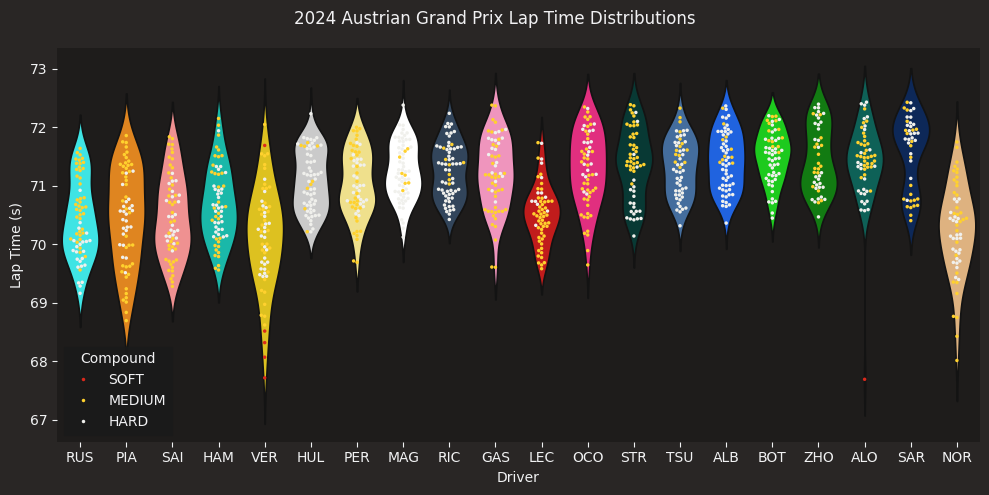

In [7]:
fastf1_util.plot_lap_time_distributions(
    driver_laps=driver_laps,
    finishing_order=finishing_order,
    driver_colors=driver_colors,
    compound_colors=compound_colors,
    title="2024 Austrian Grand Prix Lap Time Distributions",
    marker_size = 2.5
)

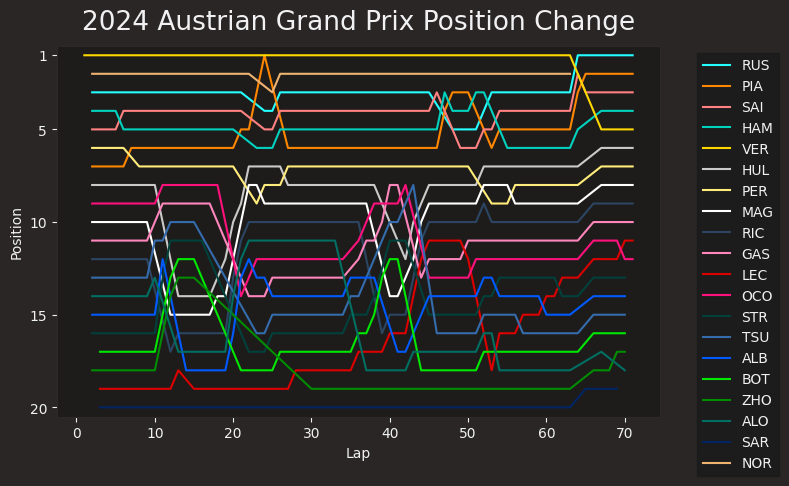

In [8]:
fastf1_util.plot_driver_positions(
    driver_laps,
    driver_colors,
    title="2024 Austrian Grand Prix Position Change")

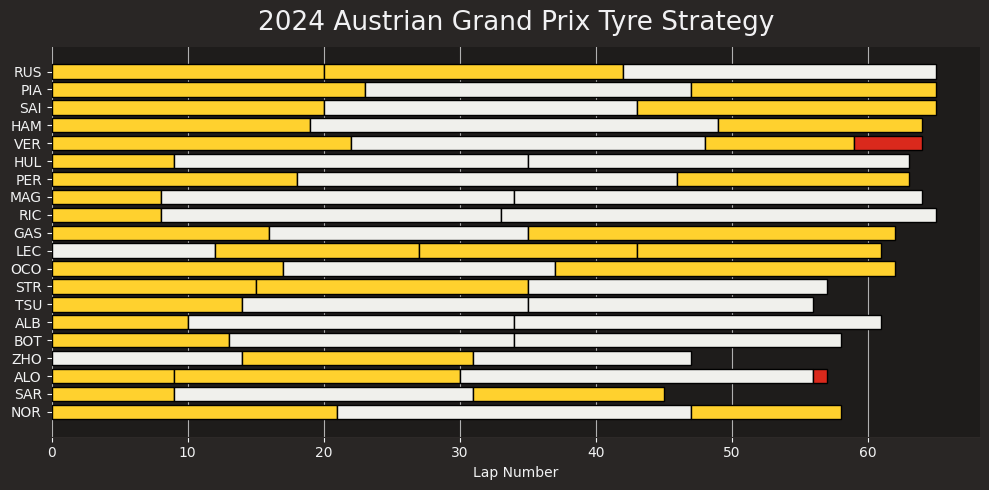

In [9]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

stints = stints.rename(columns={"LapNumber": "StintLength"})

fastf1_util.plot_tyre_strategy(
    finishing_order,
    stints,
    driver_colors,
    compound_colors,
    title="2024 Austrian Grand Prix Tyre Strategy")

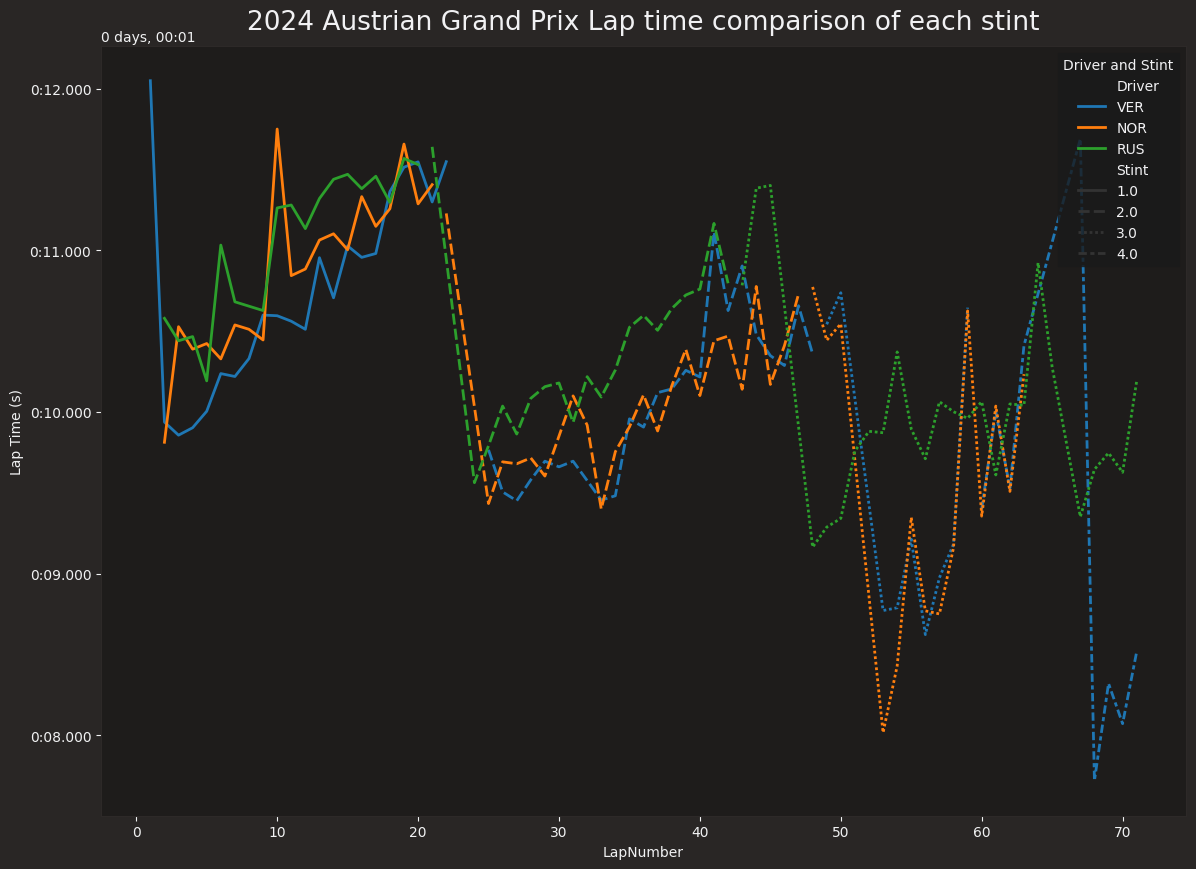

In [10]:
driver_list = ["VER", "NOR", "RUS"]
fastf1_util.plot_driver_laps(
    session,
    driver_list,
    stints,
    '2024 Austrian Grand Prix Lap time comparison of each stint')